In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
plt.style.use('ggplot')

In [59]:
def load_dataset(file_path):
    """
    LOADS csv data
    """
    return pd.read_csv(file_path)

In [60]:
df = load_dataset('../data/benin-malanville.csv') # loading benin dataset from 'data/'
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [61]:
df.describe() # describing numeric columns

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [119]:
missing_counts = df.isna().sum()
missing_counts

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [121]:
threshold = 5  # 5%
missing_percentage = df.isna().mean() * 100
high_null_cols = missing_percentage[missing_percentage > threshold]
high_null_cols

Comments    100.0
dtype: float64

In [122]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df[key_cols].info()
df[key_cols].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   GHI     525600 non-null  float64
 1   DNI     525600 non-null  float64
 2   DHI     525600 non-null  float64
 3   ModA    525600 non-null  float64
 4   ModB    525600 non-null  float64
 5   WS      525600 non-null  float64
 6   WSgust  525600 non-null  float64
dtypes: float64(7)
memory usage: 28.1 MB


,GHI,DNI,DHI,ModA,ModB,WS,WSgust
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,241.958821,167.441866,116.993033,236.589496,228.883576,2.121113,2.809195
std,330.101787,261.547532,157.463619,326.894859,316.536515,1.603466,2.029120
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.300000
50%,1.800000,0.000000,1.600000,4.500000,4.300000,1.900000,2.600000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,3.100000,4.100000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,19.500000,26.600000


In [123]:
# Calculate Z-scores for numeric sensor/weather columns
z_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[z_cols].apply(zscore)

# Flag rows where any Z-score is above 3 (or below -3)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Outlier rows: {outliers.sum()} / {len(df)}")

Outlier rows: 7893 / 525600


In [124]:
# Fill missing values in key columns with median
df_clean = df.copy()
df_clean[key_cols] = df_clean[key_cols].fillna(df_clean[key_cols].median())

# Drop rows with extreme outliers (|Z| > 3)
df_clean = df_clean[~outliers].reset_index(drop=True)

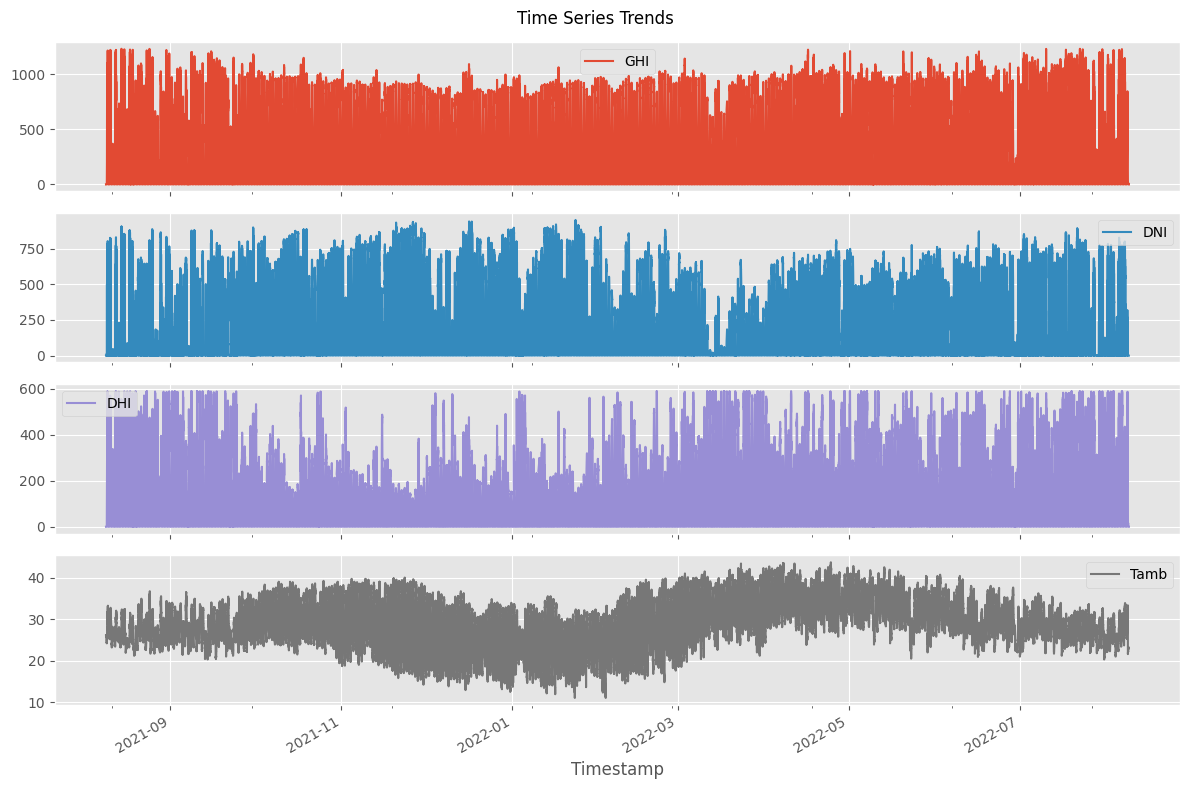

In [125]:
# Convert Timestamp column to datetime if needed
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Plot GHI, DNI, DHI, Tamb over time
plot_cols = ['GHI', 'DNI', 'DHI', 'Tamb']
df_clean.set_index('Timestamp')[plot_cols].plot(subplots=True, figsize=(12, 8), title="Time Series Trends")
plt.tight_layout()
plt.show()

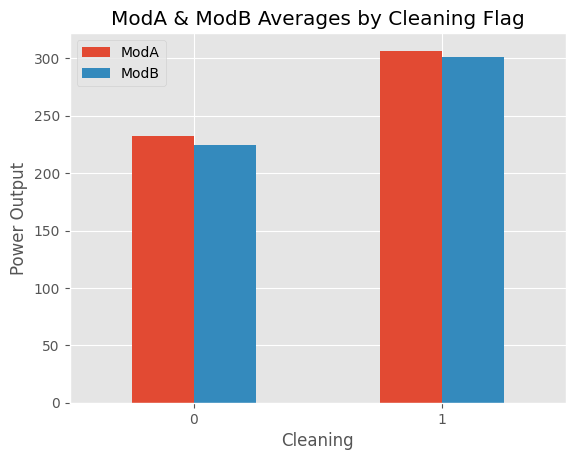

In [126]:
# Group by 'Cleaning' flag and compare ModA/ModB before vs after
if 'Cleaning' in df_clean.columns:
    df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
    plt.title("ModA & ModB Averages by Cleaning Flag")
    plt.ylabel("Power Output")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Column 'Cleaning' not found in dataset.")

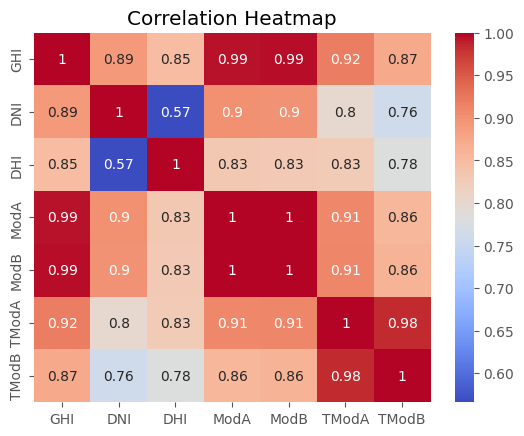

In [127]:
# Correlation heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'TModA', 'TModB']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

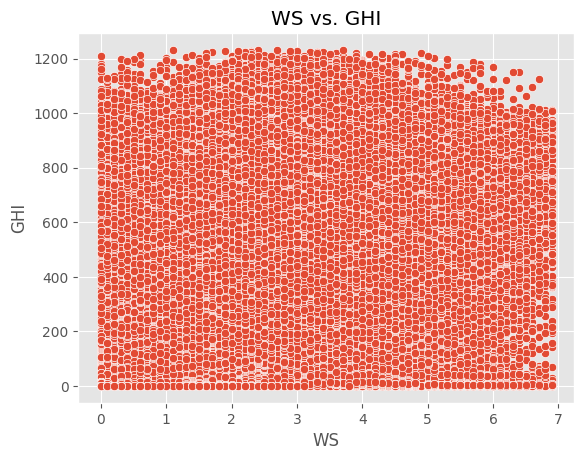

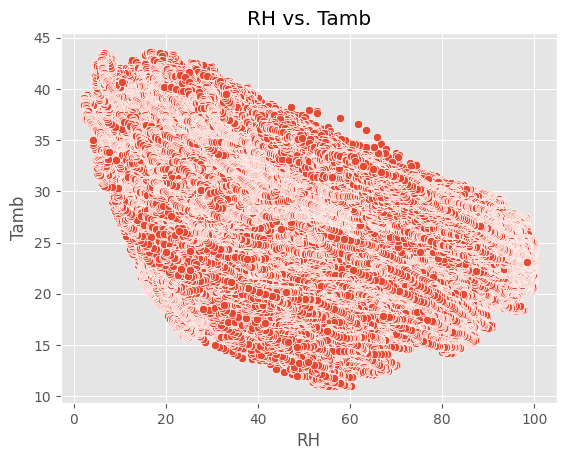

In [128]:
# Scatter plots: Wind & RH vs. GHI
sns.scatterplot(data=df_clean, x='WS', y='GHI')
plt.title("WS vs. GHI")
plt.show()

sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title("RH vs. Tamb")
plt.show()

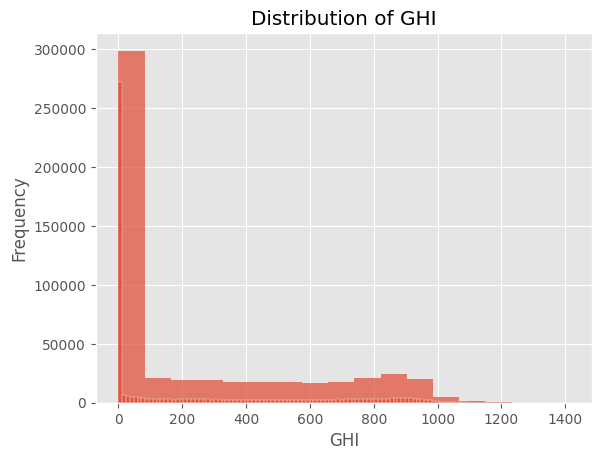

In [ ]:
# Histogram of GHI
# df_clean['GHI'].plot.hist(bins=15, alpha=0.7)
sns.histplot(data=df_clean, x=df['GHI'])
plt.title("Distribution of GHI")
plt.xlabel("GHI")
plt.show()